In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the data
links = pd.read_csv('Datasets/links.csv')
movies = pd.read_csv('Datasets/movies.csv')
ratings = pd.read_csv('Datasets/ratings.csv')
tags = pd.read_csv('Datasets/tags.csv')

In [3]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Exploratory Data Analysis


<AxesSubplot:>

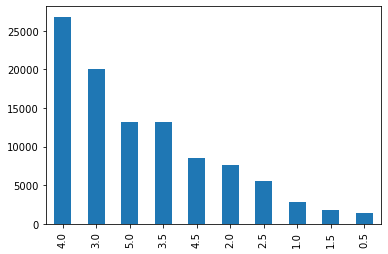

In [12]:
ratings['rating'].value_counts().plot(kind='bar')

In [23]:
#merge movie and rating
#movieId-leverage

rating_movies = pd.merge(ratings, movies, how='left', on='movieId')
rating_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [24]:
movies.shape


(9742, 3)

In [25]:
ratings.shape

(100836, 4)

In [26]:
rating_movies.shape

(100836, 6)

In [36]:
rating_movies['title'].value_counts()

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
                                   ... 
Sex, Drugs & Taxation (2013)          1
Extraordinary Tales (2015)            1
Tomorrow (2015)                       1
Embrace of the Serpent (2016)         1
31 (2016)                             1
Name: title, Length: 9719, dtype: int64

In [27]:
rating_movies_tags = pd.merge(tags,rating_movies, how="left", on="movieId")
rating_movies_tags.head()

,userId_x,movieId,tag,timestamp_x,userId_y,rating,timestamp_y,title,genres
0,2,60756,funny,1445714994,2.0,5.0,1.445715e+09,Step Brothers (2008),Comedy
1,2,60756,funny,1445714994,18.0,3.0,1.455749e+09,Step Brothers (2008),Comedy
2,2,60756,funny,1445714994,62.0,3.5,1.528934e+09,Step Brothers (2008),Comedy
3,2,60756,funny,1445714994,68.0,2.5,1.269123e+09,Step Brothers (2008),Comedy
4,2,60756,funny,1445714994,73.0,4.5,1.464196e+09,Step Brothers (2008),Comedy


In [28]:
tags.shape

(3683, 4)

In [29]:
rating_movies_tags.shape

(233234, 9)

In [30]:
rating_movies.shape

(100836, 6)

In [32]:
rating_movies_tags.isna().sum()

userId_x        0
movieId         0
tag             0
timestamp_x     0
userId_y       21
rating         21
timestamp_y    21
title          21
genres         21
dtype: int64

In [35]:
rating_movies_tags.duplicated().sum()

0

In [38]:
#the first movies along with their average rating using the head() method. Look at the following scripts:
rating_movies.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [40]:
#average ratings of sorted movies

rating_movies.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [42]:
# Total number of ratings for each
rating_movies.groupby("title")['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [43]:
ratings_mean_count = pd.DataFrame(rating_movies.groupby('title')['rating'].mean())

In [44]:
ratings_mean_count['rating_counts'] = pd.DataFrame(rating_movies.groupby('title')['rating'].count())
ratings_mean_count

,rating,rating_counts
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5
